<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/StructuralColapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

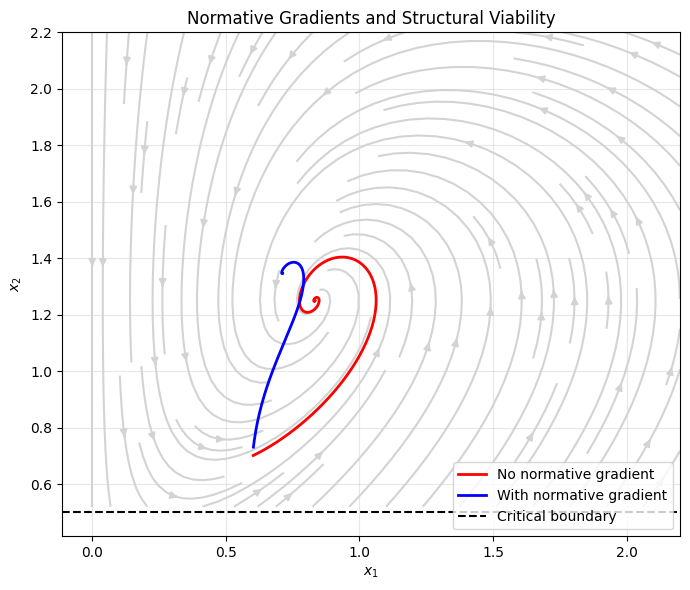

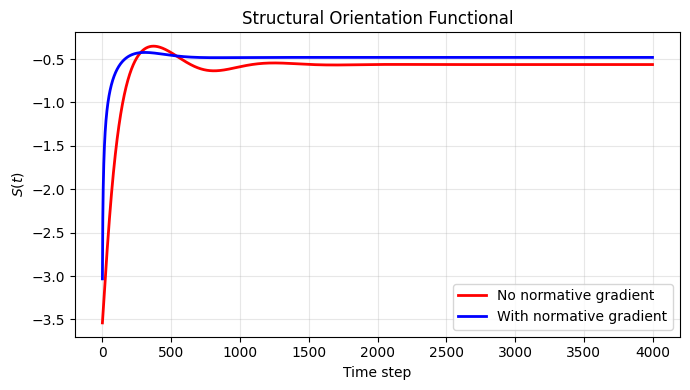

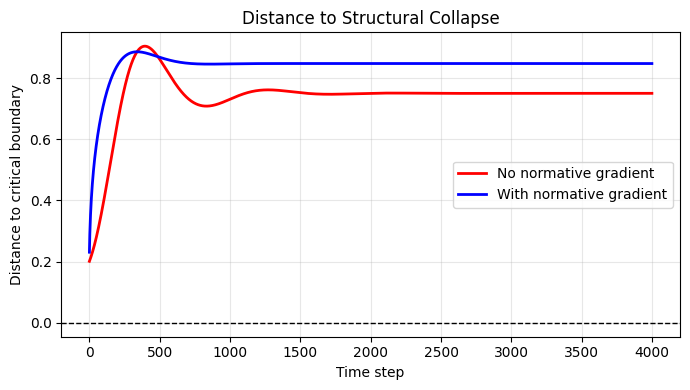

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Parameters
# =========================
a, b = 1.0, 0.8
c, d = 0.6, 0.9

alpha = 1.0
beta  = 0.15
gamma = 0.8

x2_min = 0.5
eps = 1e-3

epsilon_norm = 0.15   # strength of normative gradient

dt = 0.01
T  = 40
steps = int(T / dt)

# =========================
# Dynamics
# =========================
def f(x):
    x1, x2 = x
    dx1 = a*x1 - b*x1*x2
    dx2 = -c*x2 + d*x1
    return np.array([dx1, dx2])

def eta(x):
    x1, x2 = x
    eta1 = alpha/(1 + x1) - 2*beta*x1
    eta2 = gamma/(x2 - x2_min + eps)**2
    return np.array([eta1, eta2])

# =========================
# Trajectory integrator
# =========================
def simulate(x0, normative=False):
    traj = np.zeros((steps, 2))
    x = np.array(x0, dtype=float)

    for i in range(steps):
        if normative:
            xdot = f(x) + epsilon_norm * eta(x)
        else:
            xdot = f(x)

        x = x + dt * xdot

        # Stop if system collapses
        if x[1] <= x2_min:
            traj = traj[:i]
            break

        traj[i] = x

    return traj

# =========================
# Initial condition
# =========================
x0 = [0.6, 0.7]

traj_plain = simulate(x0, normative=False)
traj_norm  = simulate(x0, normative=True)

# =========================
# Vector field
# =========================
X1, X2 = np.meshgrid(np.linspace(0, 2.2, 25),
                     np.linspace(x2_min+0.02, 2.2, 25))

U = a*X1 - b*X1*X2
V = -c*X2 + d*X1

# =========================
# Plot
# =========================
plt.figure(figsize=(7,6))

plt.streamplot(X1, X2, U, V, density=1.1, color='lightgray')

plt.plot(traj_plain[:,0], traj_plain[:,1],
         'r-', lw=2, label='No normative gradient')

plt.plot(traj_norm[:,0], traj_norm[:,1],
         'b-', lw=2, label='With normative gradient')

plt.axhline(x2_min, color='black', ls='--', lw=1.5,
            label='Critical boundary')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Normative Gradients and Structural Viability')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =========================
# Structural functional S(t)
# =========================
def S(x):
    x1, x2 = x
    return (
        alpha*np.log(1 + x1)
        - beta*x1**2
        - gamma/(x2 - x2_min + eps)
    )

def compute_S(traj):
    return np.array([S(x) for x in traj])

S_plain = compute_S(traj_plain)
S_norm  = compute_S(traj_norm)

# =========================
# Plot S(t)
# =========================
plt.figure(figsize=(7,4))

plt.plot(S_plain, 'r-', lw=2, label='No normative gradient')
plt.plot(S_norm,  'b-', lw=2, label='With normative gradient')

plt.xlabel('Time step')
plt.ylabel(r'$S(t)$')
plt.title('Structural Orientation Functional')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =========================
# Distance to critical boundary
# =========================
def distance_to_boundary(traj):
    return traj[:,1] - x2_min

d_plain = distance_to_boundary(traj_plain)
d_norm  = distance_to_boundary(traj_norm)

# =========================
# Plot distance vs time
# =========================
plt.figure(figsize=(7,4))

plt.plot(d_plain, 'r-', lw=2, label='No normative gradient')
plt.plot(d_norm,  'b-', lw=2, label='With normative gradient')

plt.axhline(0, color='black', ls='--', lw=1)

plt.xlabel('Time step')
plt.ylabel('Distance to critical boundary')
plt.title('Distance to Structural Collapse')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
